In [1]:
# pip install
!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use(['science','no-latex'])
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint
import time

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")
DPI = 800

Imported all.


In [18]:
# Open data file
physics_model = "shielding_5cm"
file_dir = f"./assets/{physics_model}/edep.txt"
columns = ["Mass Number", "Atomic Number", "Detector Volume", "Counts"]
df = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df)
# Reorder columns
df = df[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour"]]


# Open data file
physics_model = "shielding_5cm"
file_dir = f"./assets/{physics_model}/edep-delayed.txt"
columns = ["Mass Number", "Atomic Number", "Detector Volume", "Counts"]
df_delayed = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_delayed)
# Reorder columns
df_delayed = df_delayed[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour"]]
df_delayed

,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour
0,He 2-5,2,5,3,7,1.439912e-07,False,7.910000e-22,"[[A, 1.0, 0.89], [N, 1.0, 0.89]]",0.89,red
1,He 2-5,2,5,4,9,1.919882e-07,False,7.910000e-22,"[[A, 1.0, 0.89], [N, 1.0, 0.89]]",0.89,red
2,He 2-5,2,5,2,11,9.599410e-08,False,7.910000e-22,"[[A, 1.0, 0.89], [N, 1.0, 0.89]]",0.89,red
3,Li 3-6,3,6,896,7,4.300536e-05,True,inf,None,NaN,blue
4,Li 3-6,3,6,596,9,2.860624e-05,True,inf,None,NaN,blue
...,...,...,...,...,...,...,...,...,...,...,...
269,Ca 20-42,20,42,62,11,2.975817e-06,True,inf,None,NaN,blue
270,Ca 20-43,20,43,3,7,1.439912e-07,True,inf,None,NaN,blue
271,Ca 20-43,20,43,3,11,1.439912e-07,True,inf,None,NaN,blue
272,Ca 20-44,20,44,4,7,1.919882e-07,True,inf,None,NaN,blue


In [24]:
df_delayed_counts = df_delayed.groupby(['Atomic Number'])["Counts"].sum()

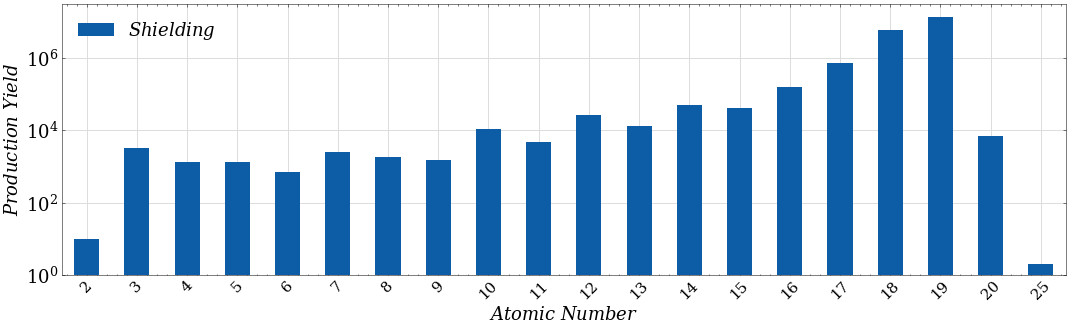

In [26]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.rcParams.update({'font.size': 18})
ax = df_delayed_counts.plot.bar(x="Atomic Number", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
ax.set_ylabel(r"$Production~Yield$")
ax.set_xlabel(r"$Atomic~Number$")
plt.xticks(rotation=45, fontsize="small")
plt.legend(labels=[r"$Shielding$",r"$FTFP$"])
#plt.title("Total Isotope Yields")
#plt.savefig('./img/total-iso-yields', dpi=DPI)
plt.show()
#df_shielding_counts, df_FTFP_counts